Resource:
https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

/ucb/ucb_specific/03_Python_activities/datacamp/05-tweepy_ipynb

https://towardsdatascience.com/text-analytics-101-word-cloud-and-sentiment-analysis-2c3ade81c7e8

And there is a text_analysis sentiment workbook that you can try to adjust.


In [23]:
import pandas as pd

df = pd.read_csv('Resources/tweepy/recession_Nov29.csv', index_col=[0])
df

,edit_history_tweet_ids,id,text,withheld
0,['1597622570668691457'],1.597623e+18,Make Money With The Dow In This Recession!\n#S...,NaN
1,['1597622431765893120'],1.597622e+18,"How to turn $100 into $100,000 in less than a ...",NaN
2,['1597622112180924423'],1.597622e+18,#Team42 #42macro #BearMarket2022\n#riskmanagem...,NaN
3,['1597621783913447427'],1.597622e+18,"I must say the distraction from #inflation, #r...",NaN
4,['1597621612018270210'],1.597622e+18,Persistent #inflation and expectations of furt...,NaN
...,...,...,...,...
3690,['1595088139508678656'],1.595088e+18,"Where the Fed leads, other central banks after...",NaN
3691,['1595088047770832899'],1.595088e+18,#recession ... #GFC2 US #Housing Bubble 2.0 ed...,NaN
3692,['1595086753408643074'],1.595087e+18,#recession ... #Fed Pushing on a String editio...,NaN
3693,['1595086675918692352'],1.595087e+18,@RishiSunak @EDarwinAcademy Are they thrilled ...,NaN


In [24]:
pip install tweepy

  Using cached tweepy-4.12.1-py3-none-any.whl (101 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
redshift-connector 2.0.908 requires requests<2.28.1,>=2.23.0, but you have requests 2.28.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


In [25]:
    #Data Extraction
import tweepy
import pandas as pd
#query = '#recession -is:retweet'
query = '@elonmusk -is:retweet'
tw_clnt=tweepy.Client(bearer_token='AAA..')
#find your own bearer token from Twitter
#https://developer.twitter.com/en/docs/authentication/oauth-2-0/bearer-tokens
tweets=tweepy.Paginator(tw_clnt.search_recent_tweets,query,max_results=100).flatten(limit=5000)
df=pd.DataFrame(tweets)
df.head(2)

,edit_history_tweet_ids,id,text
0,[1598103895502647297],1598103895502647297,@bennyjohnson @StephenAtHome Can we please mak...
1,[1598103895406153728],1598103895406153728,@elonmusk So you lied again?\nhttps://t.co/yDK...


In [26]:
df

,edit_history_tweet_ids,id,text
0,[1598103895502647297],1598103895502647297,@bennyjohnson @StephenAtHome Can we please mak...
1,[1598103895406153728],1598103895406153728,@elonmusk So you lied again?\nhttps://t.co/yDK...
2,[1598103895246778370],1598103895246778370,@CoinMovers @SohailVibes @elonmusk @tim_cook T...
3,[1598103895032877056],1598103895032877056,@EvasTeslaSPlaid @elonmusk Free speech was a j...
4,[1598103894164668417],1598103894164668417,@Beatrice_Rosen @elonmusk Et comment ? en vira...
...,...,...,...
4995,[1598101402093748224],1598101402093748224,"@LivePDDave1 @elonmusk Right, they did it with..."
4996,[1598101402072809472],1598101402072809472,@elonmusk @tim_cook Now buy Apple 🍎
4997,[1598101401124864003],1598101401124864003,@elonmusk https://t.co/XHvDxfgyOm
4998,[1598101401049378816],1598101401049378816,@LakasNgTimog @elonmusk What do you think abou...


In [27]:
df.id.count(), df.isnull().sum()


(5000,
 edit_history_tweet_ids    0
 id                        0
 text                      0
 dtype: int64)

In [28]:
df['text'] = df['text'].astype(str).str.lower()
df.head(3)

,edit_history_tweet_ids,id,text
0,[1598103895502647297],1598103895502647297,@bennyjohnson @stephenathome can we please mak...
1,[1598103895406153728],1598103895406153728,@elonmusk so you lied again?\nhttps://t.co/ydk...
2,[1598103895246778370],1598103895246778370,@coinmovers @sohailvibes @elonmusk @tim_cook t...


In [29]:
pip install nltk

  Using cached nltk-3.7-py3-none-any.whl (1.5 MB)
  Using cached regex-2022.10.31-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (772 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)
Note: you may need to restart the kernel to use updated packages.


In [30]:
from nltk.tokenize import RegexpTokenizer

regexp = RegexpTokenizer('\w+')

df['text_token']=df['text'].apply(regexp.tokenize)
df.head(3)

,edit_history_tweet_ids,id,text,text_token
0,[1598103895502647297],1598103895502647297,@bennyjohnson @stephenathome can we please mak...,"[bennyjohnson, stephenathome, can, we, please,..."
1,[1598103895406153728],1598103895406153728,@elonmusk so you lied again?\nhttps://t.co/ydk...,"[elonmusk, so, you, lied, again, https, t, co,..."
2,[1598103895246778370],1598103895246778370,@coinmovers @sohailvibes @elonmusk @tim_cook t...,"[coinmovers, sohailvibes, elonmusk, tim_cook, ..."


In [31]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
from nltk.corpus import stopwords

# Make a list of english stopwords
stopwords = nltk.corpus.stopwords.words("english")

# Extend the list with your own custom stopwords
my_stopwords = ['https']
stopwords.extend(my_stopwords)

In [33]:
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/repl/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:
df['text_token'] = df['text_token'].apply(lambda x: [item for item in x if item not in stopwords])
df.head(3)

,edit_history_tweet_ids,id,text,text_token
0,[1598103895502647297],1598103895502647297,@bennyjohnson @stephenathome can we please mak...,"[bennyjohnson, stephenathome, please, make, ex..."
1,[1598103895406153728],1598103895406153728,@elonmusk so you lied again?\nhttps://t.co/ydk...,"[elonmusk, lied, co, ydksskjtm6]"
2,[1598103895246778370],1598103895246778370,@coinmovers @sohailvibes @elonmusk @tim_cook t...,"[coinmovers, sohailvibes, elonmusk, tim_cook, ..."


In [35]:
df['text_string'] = df['text_token'].apply(lambda x: ' '.join([item for item in x if len(item)>2]))


In [36]:
df[['text', 'text_token', 'text_string']].head()


,text,text_token,text_string
0,@bennyjohnson @stephenathome can we please mak...,"[bennyjohnson, stephenathome, please, make, ex...",bennyjohnson stephenathome please make excepti...
1,@elonmusk so you lied again?\nhttps://t.co/ydk...,"[elonmusk, lied, co, ydksskjtm6]",elonmusk lied ydksskjtm6
2,@coinmovers @sohailvibes @elonmusk @tim_cook t...,"[coinmovers, sohailvibes, elonmusk, tim_cook, ...",coinmovers sohailvibes elonmusk tim_cook super...
3,@evasteslasplaid @elonmusk free speech was a j...,"[evasteslasplaid, elonmusk, free, speech, jour...",evasteslasplaid elonmusk free speech journey e...
4,@beatrice_rosen @elonmusk et comment ? en vira...,"[beatrice_rosen, elonmusk, et, comment, en, vi...",beatrice_rosen elonmusk comment virant tous le...


In [37]:
all_words = ' '.join([word for word in df['text_string']])

In [38]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/repl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
tokenized_words = nltk.tokenize.word_tokenize(all_words)

In [40]:
from nltk.probability import FreqDist

fdist = FreqDist(tokenized_words)
fdist


FreqDist({'elonmusk': 5119, 'twitter': 588, 'tim_cook': 567, 'apple': 442, 'elon': 395, 'like': 323, 'people': 275, 'would': 251, 'jhall': 238, 'phone': 224, ...})

In [41]:
#https://catriscode.com/2021/03/02/extracting-or-removing-mentions-and-hashtags-in-tweets-using-python/

In [42]:
import re
#clean_tweet = re.sub("@[A-Za-z0-9_]+","", tweet)
#clean_tweet = re.sub("#[A-Za-z0-9_]+","", clean_tweet)

def tweet_cleaner(x):
	text=re.sub("[@&][A-Za-z0-9_]+","", x)     # Remove mentions
	text=re.sub(r"http\S+","", text)           # Remove media links
	return pd.Series([text])
df[['plain_text']] = df.text.apply(tweet_cleaner)

#Convert all text to lowercase
df.plain_text = df.plain_text.str.upper()

#Remove newline character
df.plain_text = df.plain_text.str.replace('\n', '')

In [43]:
pip install vaderSentiment

  Using cached vaderSentiment-3.3.2-py2.py3-none-any.whl (125 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 kB)
  Using cached certifi-2022.9.24-py3-none-any.whl (161 kB)
  Using cached idna-3.4-py3-none-any.whl (61 kB)
  Using cached urllib3-1.26.13-py2.py3-none-any.whl (140 kB)
  Using cached charset_normalizer-2.1.1-py3-none-any.whl (39 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
redshift-connector 2.0.908 requires requests<2.28.1,>=2.23.0, but you have requests 2.28.1 which is incompatible.
Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:>

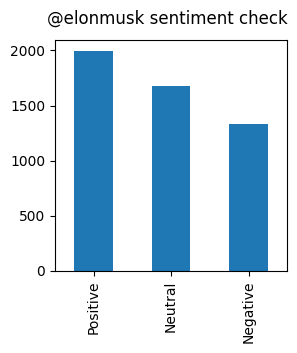

In [46]:
#Sentiment Check
from matplotlib import pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()        
df['polarity']=[analyzer.polarity_scores(text)['compound'] for text in df.plain_text]
def get_sentiment(polarity):
    if polarity < 0.0:
        return 'Negative'
    elif polarity > 0.2:
        return 'Positive'
    else:
        return 'Neutral'
df['sentiment']=df.polarity.apply(get_sentiment)
fig = plt.figure(figsize=(3,3))
fig.suptitle('@elonmusk sentiment check')

#fig.suptitle('test title', fontsize=20)


df.sentiment.value_counts().plot.bar()

In [55]:
df

so don't have to rerun...

see:

Documents/ucb/ucb_specific/03_Python_activities/datacamp/05-tweepy_ipynb/(copy)

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/

https://towardsdatascience.com/text-analytics-101-word-cloud-and-sentiment-analysis-2c3ade81c7e8

trying to figure out sentiment analysis ... and getting rid of all those words 

In [1]:

import pandas as pd

df = pd.read_csv('Resources/tweepy/ntlk_adjusted_Nov29_recession.csv', index_col=[0])
df


In [3]:
df['id'] = df['id'].astype('int64')

In [6]:
df.info()

https://www.kirenz.com/post/2021-12-11-text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/text-mining-and-sentiment-analysis-with-nltk-and-pandas-in-python/